# 의사결정 트리 파이썬 코드 실습
## (1) 패키지 로드

In [1]:
from sklearn.metrics import classification_report, confusion_matrix

**sklearn.metrics**는 사이킷런 패키지에서 지원하는 분류 모델의 성능을 평가에 사용되는 모듈이다.  

sklearn.metrics 패키지의 모듈 중 **classification_report**와 **confusion_matrix**에 대해서 설명하겠다.  
**classification_report** 는 정밀도, 재현율, F1 점수를 구하는 classification_report 명령을 제공한다.
이 명령을 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1 점수를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가한다.- 자세한 설명은 아래의 링크를 참고하자.  

**confusion_matrix** 분류결과표는 타겟의 원래 클래스와 모델이 예측한 클래스가 일치하는지를 갯수로 센 결과를 표로 나타낸 것이다. 정답 클래스는 행으로, 예측한 클래스는 열로 나타낸다.

-> 결국 예측 결과를 자세히 분석할 수 있도록 도와주는 모델들이다.

In [2]:
from sklearn.model_selection import train_test_split

**sklearn.model_selection**은 scikit-learn 패키지 중 클래스를 나눌 때, 그리고 함수를 통해 train/test 셋을 나눌 때, 아울러 모델 검증에 사용되는 서브 패키지이다.  

**train_test_split**은 scikit-learn의 model_selection 패키지에서 제공하는  
모듈로써 손쉽게 train set(학습데이터 셋)과 test set(테스트 셋)을 분리 할 수 있다.  

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn import tree

**sklearn.tree**는 scikit-learn 패캐지 중 분류 및 회귀를 위한 의사결정 트리 기반 모델이 있는 서브 패키지이다.  
sklearn.tree 패키지의 모듈 중 **DecisionTreeClassifier**는 의사결정 트리 분류 모듈이다.

In [5]:
from IPython.display import Image

**iPython.display**는 iPython 내에 정보를 보여주는 도구 용도의 공용 API이다.  
IPython.display API 모듈 증 Image는 원시(raw)데이터가 있는 png나 jpeg등의 이미지 객체를 만드는 모듈이다.  
-> raw 데이터를 통해 이미지 파일을 만드는 모듈이다.

In [6]:
import pandas as pd

**pandas**는 데이터를 구조화된 형식으로 가공 및 분석할 수 있도록 자료구조를 제공하는 패키지이다.
여기서 as pd는 pandas를 약칭 pd로 사용한다는 의미이다.

In [7]:
import numpy as np

**Numpy**는 Numercial Python으로 고성능 계산이나 데이터 분석에 유용한 패키지이다.  여기서 as pd는 pandas를 약칭 pd로 사용한다는 의미이다.

In [8]:
import pydotplus     # Anaconda Prompt에서 pip install pydotplus 라고 치면 pydotplus가 설치된다.

**pydotplus**는 그래프를 생성하는 graphviz의 dot 언어를 파이썬 인터페이스로 제공하는 모듈이다.

In [9]:
import os

**os**는 운영체제와 상호작용하기 위한 기본적인 기능(경로 생성, 변경 등)이 제공되는 모듈이다.

## (2) 데이터 로드

In [10]:
tennis_data = pd.read_csv('playtennis.csv')
tennis_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


## (3) 데이터 전처리
다음 코드는 변수 tennis_data의 각 컬럼(outlook, temp, hunidity, windy, play)의 값(sunny, overcast, ...등)을 문자열(string) 타입에서 숫자(int) 타입으로 대치(replace)해 변수 tennis_data에 저장한다.  
  
  -> 문자열 값들을 숫자형 타입으로 맵핑시켜 다시 저장한다.

In [11]:
tennis_data.outlook = tennis_data.outlook.replace('sunny',0)
tennis_data.outlook = tennis_data.outlook.replace('overcast', 1)
tennis_data.outlook = tennis_data.outlook.replace('rainy',2)

tennis_data.temp = tennis_data.temp.replace('hot',3)
tennis_data.temp = tennis_data.temp.replace('mild',4)
tennis_data.temp = tennis_data.temp.replace('cool',5)

tennis_data.humidity = tennis_data.humidity.replace('high',6)
tennis_data.humidity = tennis_data.humidity.replace('normal',7)

tennis_data.windy = tennis_data.windy.replace(False,8)
tennis_data.windy = tennis_data.windy.replace(True,9)

tennis_data.play = tennis_data.play.replace('no',10)
tennis_data.play = tennis_data.play.replace('yes',11)

tennis_data

,outlook,temp,humidity,windy,play
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


## (4) 속성과 클래스 분리

In [12]:
X = np.array(pd.DataFrame(tennis_data, columns=['outlook','temp', 'humidity', 'windy']))


변수 tennis_data의 컬럼(outlook, temp 등)의 값들을 데이터프레임 형태로 추출하고  
np.array 함수를 이용해 추출한 데이터를 배열형태로 변환한 후 변수 X에 저장한다.  
np.array는 배열 생성 함수이다.

In [13]:
y = np.array(pd.DataFrame(tennis_data, columns=['play']))


변수 tennis_data의 컬럼(play)값을 데이터 프레임 형태로 추출하고 np.array 함수를 이용해 추출한 데이터를 배열형태로 변환한 후 변수 y에 저장한다.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

load된 train_test_aplit 모듈을 이용해 변수 X에 입력 4개 컬럼의 데이터와 변수 y에 입력한 playtennis 컬럼의 데이터를, train(훈련)과 test(테스트)로 구분해, 임의의 개수로 각각 변수 X_train, X_test, y_train, y_test에 저장한다.

In [15]:
X_train

array([[1, 5, 7, 9],
       [0, 4, 6, 8],
       [0, 3, 6, 8],
       [2, 5, 7, 9],
       [0, 4, 7, 9],
       [0, 3, 6, 9],
       [2, 4, 6, 8],
       [1, 3, 6, 8],
       [2, 5, 7, 8],
       [1, 4, 6, 9]], dtype=int64)

In [16]:
X_test

array([[0, 5, 7, 8],
       [2, 4, 7, 8],
       [1, 3, 7, 8],
       [2, 4, 6, 9]], dtype=int64)

In [17]:
y_train

array([[11],
       [10],
       [10],
       [10],
       [11],
       [10],
       [11],
       [11],
       [11],
       [11]], dtype=int64)

In [18]:
y_test

array([[11],
       [11],
       [11],
       [10]], dtype=int64)

## (5) 데이터 학습

In [19]:
dt_clf = DecisionTreeClassifier()

로드된 의사결정 트리 분류 모듈을 변수 dt_clf에 저장한다.

In [20]:
dt_clf = dt_clf.fit(X_train, y_train)

의사결정 트리 분류 모듈이 저장된 **변수 dt_clf 의 함수 fit()** 에 **변수 X_train, y_train**을 입력해 의사결정 트리 분류 모델을 생성한다. -> 학습시키는 과정이다.  
그런 다음 생성한 모델을 다시 변수 dt_clf에 저장한다.

In [21]:
dt_prediction = dt_clf.predict(X_test)

변수 dt_clf의 함수 prdict()에 변수 X_test를 입력한다. 그리고 입력한 X_test에 대한 클래스 예측 값을 변수 dt_prediction에 저장한다. 

## (7) 의사결정 트리 그래프 표현


In [22]:
os.environ["PATH"] += os.pathsep + "C:\Program Files\Graphviz\bin"

In [23]:
feature_names = tennis_data.columns.tolist()

In [24]:
featrue_names = feature_names[0:4]

In [25]:
target_name = np.array(['Play No', 'Play Yes'])

In [26]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   #feature_names = feature_names,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

In [27]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

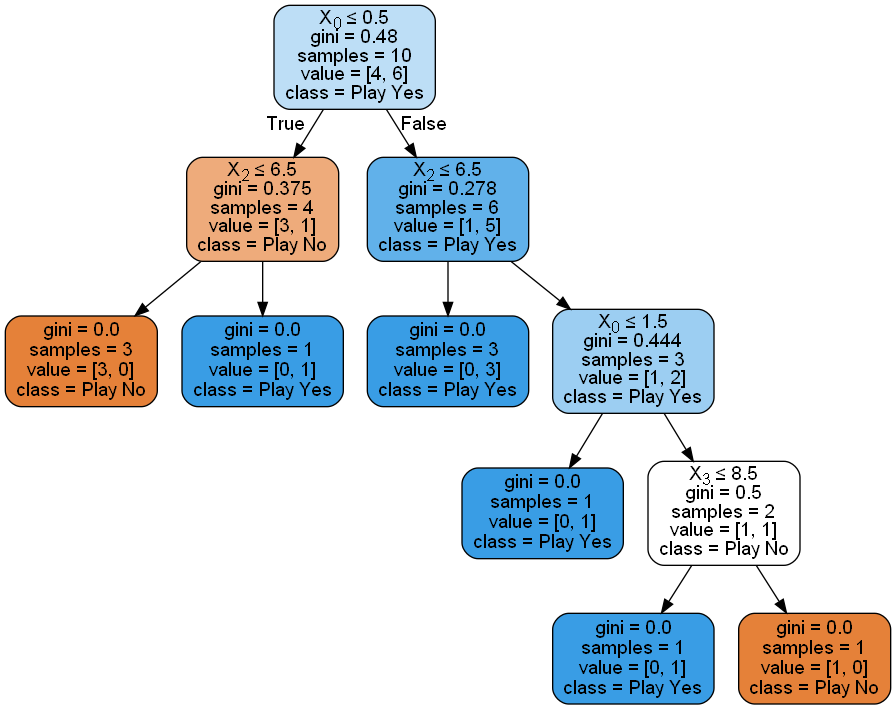

In [28]:
Image(dt_graph.create_png())

참고 링크 :   
https://jfun.tistory.com/41
https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html